In [7]:
import numpy as np
import scanpy as sc
from sklearn import decomposition, manifold
import matplotlib.pyplot as plt
import pandas as pd
import time
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [2]:
lymphoid_lsi = pd.read_csv("lymphoid_lsi.csv", sep=",",index_col=0)
# the first LSI dimension is highly correlated with sequencing depth in that case, as sometimes happens with scATAC-seq data. 
# For this reason we discard the first component for downstream analysis.
lymphoid_lsi2 = lymphoid_lsi.iloc[:,1:50]

In [3]:
lymphoid_lsi2.shape

(8221, 49)

In [4]:
lymphoid_celltype = pd.read_csv("lymphoid_celltype.csv", sep=",",index_col=0)
lymphoid_celltype_values = lymphoid_celltype['x'].values
lymphoid_monocle = pd.read_csv("lymphoid.monocle_pseudotime.csv", sep=",",index_col=0)
lymphoid_monocle_time = lymphoid_monocle['x'].values

In [5]:
zip_types = dict(zip(set(lymphoid_celltype_values),np.arange(1,8,1)))
cell_clusters  =  [zip_types[i] for i in lymphoid_celltype_values]

The code runs 16s.


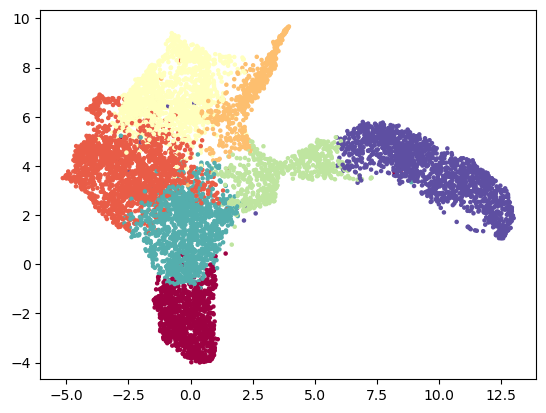

In [8]:
from umap import UMAP
start_time = time.time()
reducer = UMAP(n_neighbors=30,min_dist=0.3) #   
Y_umap = reducer.fit_transform(lymphoid_lsi2)
end_time = time.time()
print('The code runs {:.0f}s.'.format(end_time - start_time))
plt.scatter(Y_umap[:,0],Y_umap[:,1], c= cell_clusters,s = 5,cmap='Spectral')

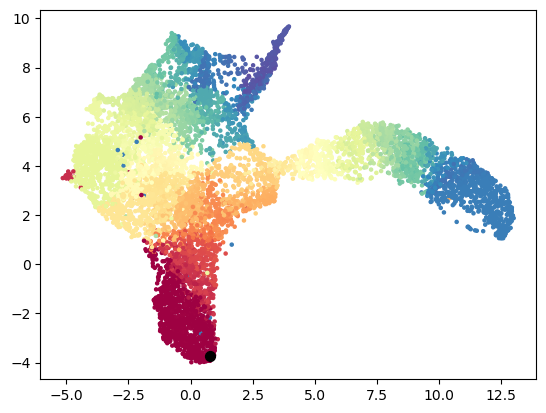

In [9]:
plt.scatter(Y_umap[:,0],Y_umap[:,1], c= lymphoid_monocle_time,s = 5,cmap='Spectral')
plt.scatter(Y_umap[3047,0],Y_umap[3047,1], c= 'black',s = 50)

The code runs 32s.


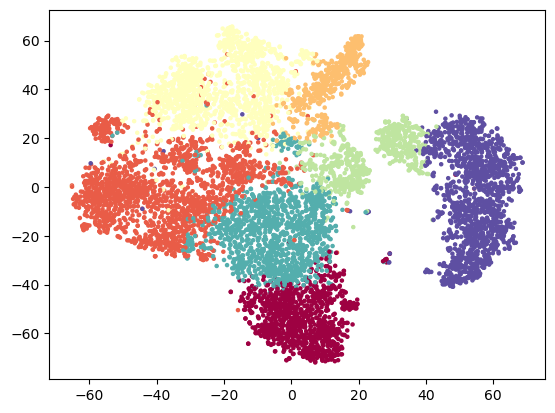

In [10]:
# pca_operator = decomposition.PCA(n_components=100)
start_time = time.time()
tsne_operator = manifold.TSNE(n_components=2)
Y_tsne = tsne_operator.fit_transform(lymphoid_lsi2)
end_time = time.time()
print('The code runs {:.0f}s.'.format(end_time - start_time))
plt.scatter(Y_tsne[:,0],Y_tsne[:,1], c=cell_clusters,s =5,cmap="Spectral")

In [11]:
import phate

Calculating PHATE...
  Running PHATE on 8221 observations and 49 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 1.27 seconds.
    Calculating affinities...
    Calculated affinities in 0.13 seconds.
  Calculated graph and diffusion operator in 1.42 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.54 seconds.
    Calculating KMeans...
    Calculated KMeans in 1.60 seconds.
  Calculated landmark operator in 2.63 seconds.
  Calculating optimal t...
    Automatically selected t = 3
  Calculated optimal t in 2.21 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.15 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 1.97 seconds.
Calculated PHATE in 8.39 seconds.


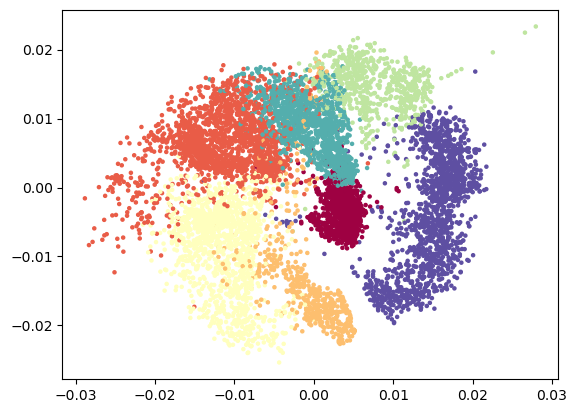

In [12]:
# cell_types
phate_operator = phate.PHATE(n_jobs=-2)
Y_phate = phate_operator.fit_transform(lymphoid_lsi2)
plt.scatter(Y_phate[:,0], Y_phate[:,1], c=cell_clusters,s= 5,cmap='Spectral')

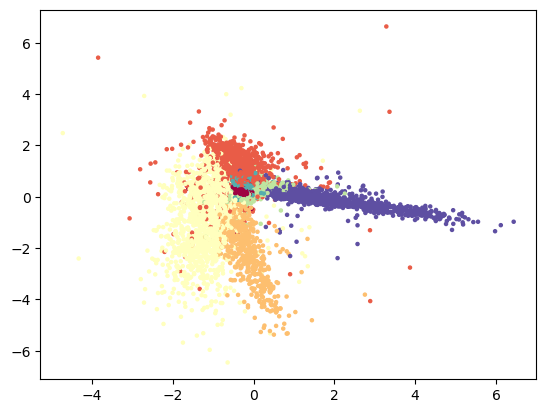

In [13]:
pca_operator = decomposition.PCA(n_components=2)
Y_pca = pca_operator.fit_transform(lymphoid_lsi2)
plt.scatter(Y_pca[:,0], Y_pca[:,1], c=cell_clusters,s= 5,cmap='Spectral')

In [19]:
pd.DataFrame(Y_pca).to_csv('lymphoid.Y_pca.csv')
pd.DataFrame(Y_umap).to_csv('lymphoid.Y_umap.csv')
pd.DataFrame(Y_tsne).to_csv('lymphoid.Y_tsne.csv')
pd.DataFrame(Y_phate).to_csv('lymphoid.Y_phate.csv')